In [1]:
import pandas as pd

# Load the dataset
file_path = 'dailyActivity_merged.csv'
data = pd.read_csv(file_path)

# Display the first few rows and summary of data
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

(           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
 0  1503960366    4/12/2016       13162           8.50             8.50   
 1  1503960366    4/13/2016       10735           6.97             6.97   
 2  1503960366    4/14/2016       10460           6.74             6.74   
 3  1503960366    4/15/2016        9762           6.28             6.28   
 4  1503960366    4/16/2016       12669           8.16             8.16   
 
    LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
 0                       0.0                1.88                      0.55   
 1                       0.0                1.57                      0.69   
 2                       0.0                2.44                      0.40   
 3                       0.0                2.14                      1.26   
 4                       0.0                2.71                      0.41   
 
    LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
 0     

In [2]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = data[['TotalSteps', 'TotalDistance', 'TrackerDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance',
          'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
          'LightlyActiveMinutes', 'SedentaryMinutes']]
y = data['Calories']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm the split sizes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((752, 11), (188, 11), (752,), (188,))

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

# Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression:", mse_lr, mae_lr, r2_lr)


Linear Regression: 142040.9402770802 296.5038615667418 0.6994948915941237


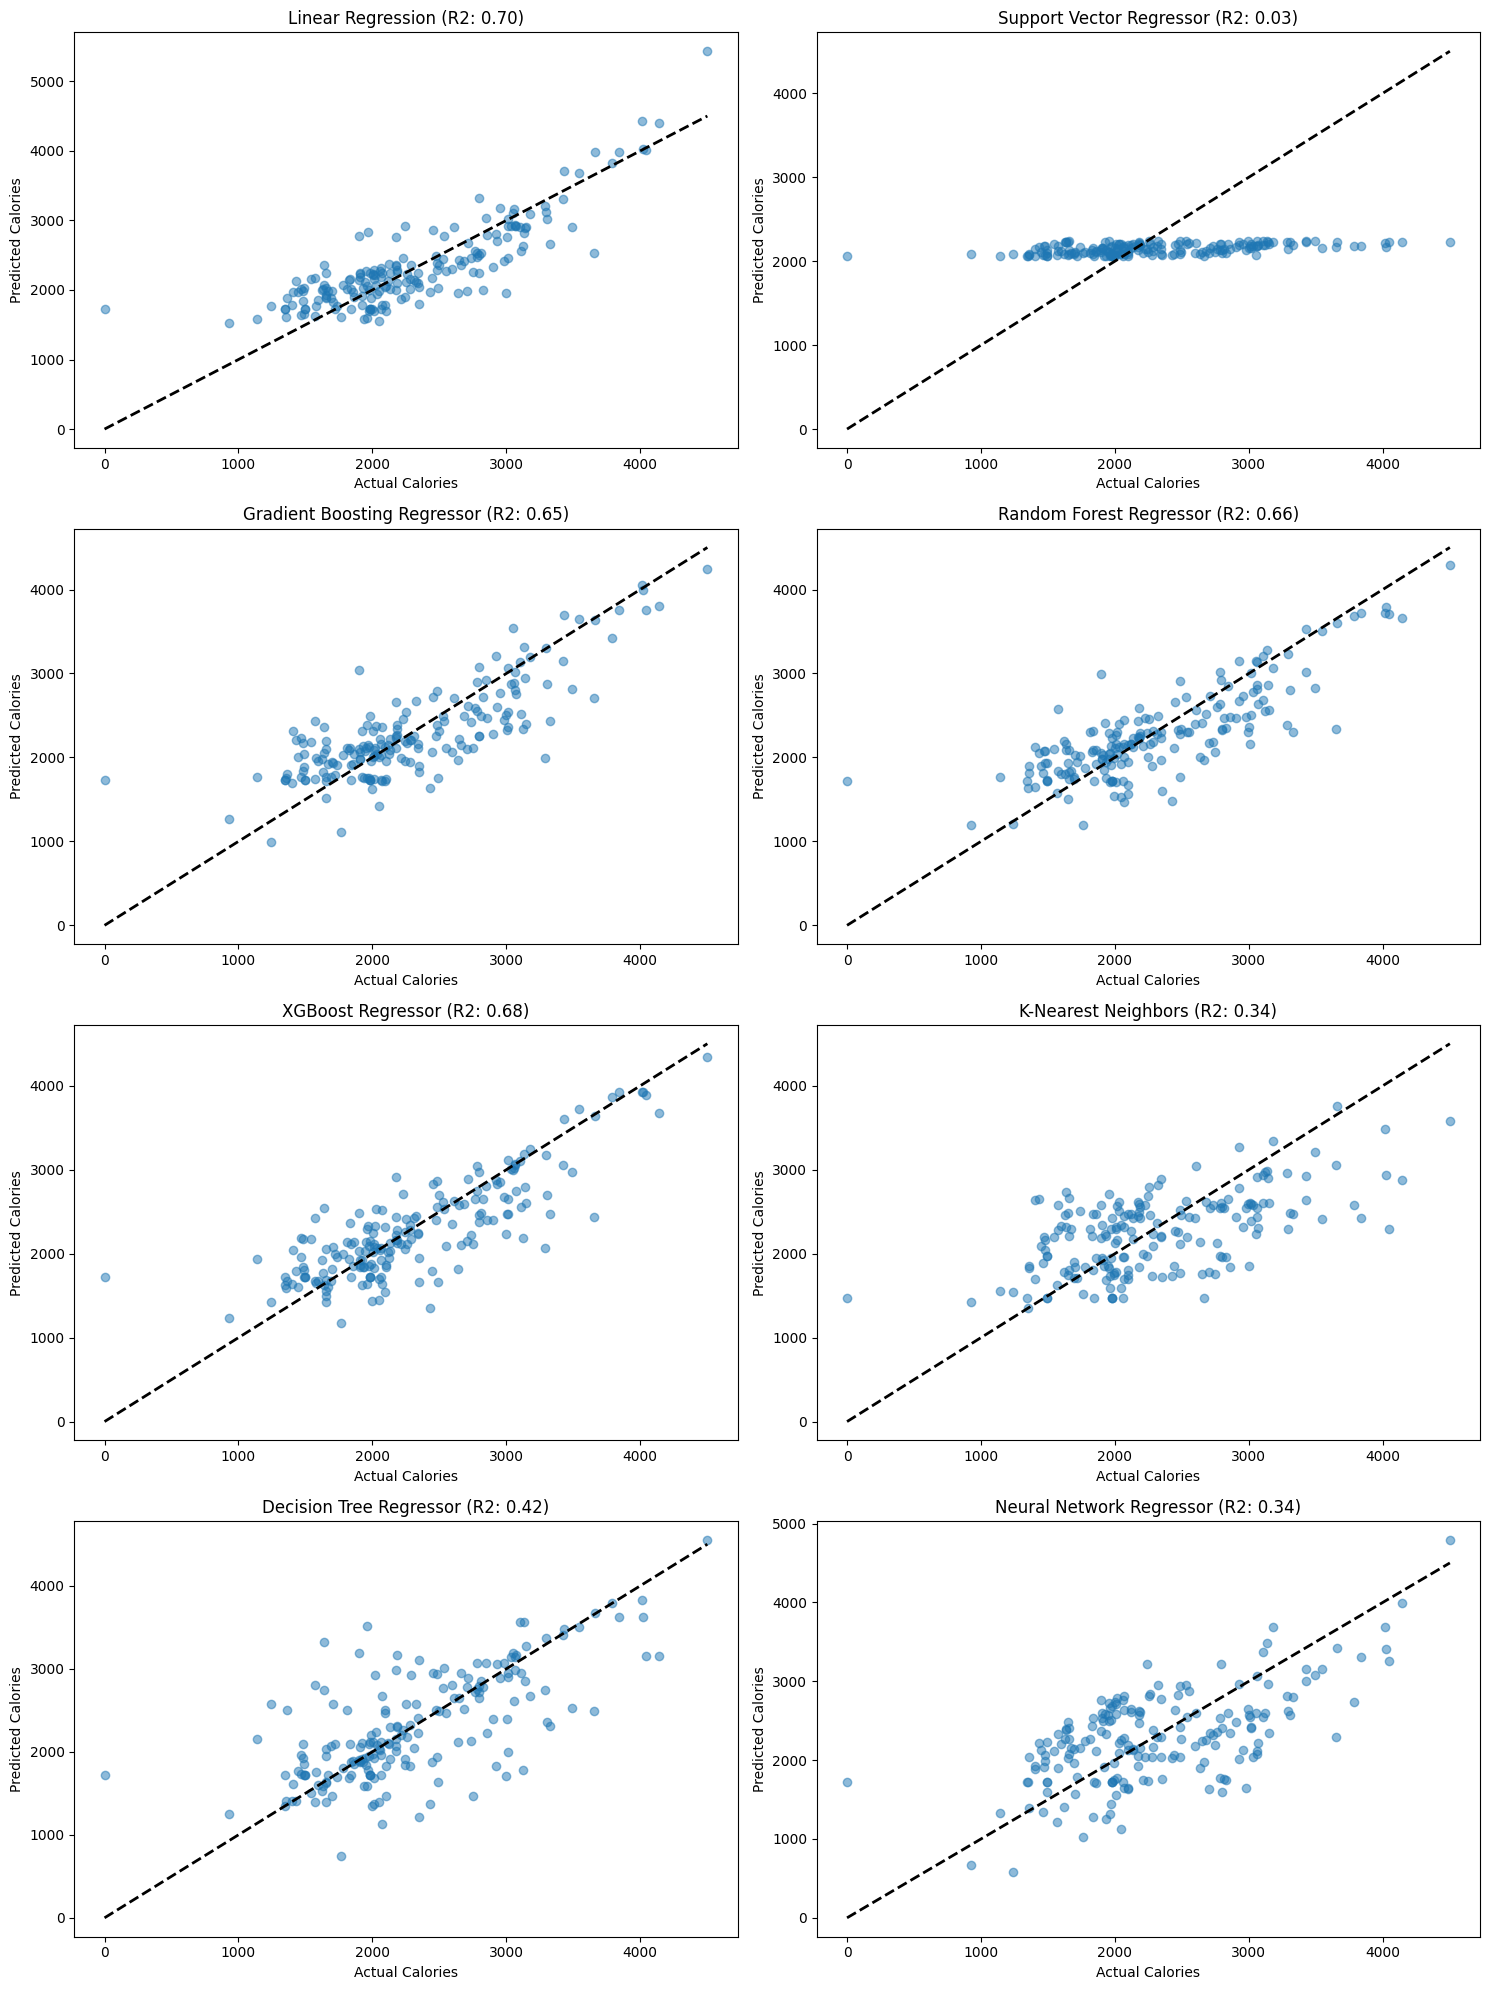

Linear Regression - MSE: 142040.94, MAE: 296.50, R2: 0.70
Support Vector Regressor - MSE: 460392.37, MAE: 514.40, R2: 0.03
Gradient Boosting Regressor - MSE: 164845.85, MAE: 313.36, R2: 0.65
Random Forest Regressor - MSE: 159063.29, MAE: 302.98, R2: 0.66
XGBoost Regressor - MSE: 153566.49, MAE: 283.54, R2: 0.68
K-Nearest Neighbors - MSE: 310697.20, MAE: 448.61, R2: 0.34
Decision Tree Regressor - MSE: 273404.74, MAE: 353.35, R2: 0.42
Neural Network Regressor - MSE: 312412.39, MAE: 478.43, R2: 0.34


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Model list and names for easier reference
models = [
    ("Linear Regression", LinearRegression()),
    ("Support Vector Regressor", SVR(kernel="rbf")),
    ("Gradient Boosting Regressor", GradientBoostingRegressor(random_state=42)),
    ("Random Forest Regressor", RandomForestRegressor(random_state=42)),
    ("XGBoost Regressor", XGBRegressor(random_state=42, objective="reg:squarederror")),
    ("K-Nearest Neighbors", KNeighborsRegressor(n_neighbors=5)),
    ("Decision Tree Regressor", DecisionTreeRegressor(random_state=42)),
    ("Neural Network Regressor", MLPRegressor(random_state=42, max_iter=1000))
]

# Function to fit, predict and visualize results for each model
def evaluate_models(X_train, X_test, y_train, y_test):
    results = []
    plt.figure(figsize=(15, 20))
    for i, (name, model) in enumerate(models):
        # Fit the model
        model.fit(X_train, y_train)
        # Predict on test set
        y_pred = model.predict(X_test)

        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results.append((name, mse, mae, r2))

        # Plot the actual vs predicted values
        plt.subplot(4, 2, i+1)
        plt.scatter(y_test, y_pred, alpha=0.5)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
        plt.xlabel("Actual Calories")
        plt.ylabel("Predicted Calories")
        plt.title(f"{name} (R2: {r2:.2f})")

    plt.tight_layout()
    plt.show()

    # Display metrics
    for name, mse, mae, r2 in results:
        print(f"{name} - MSE: {mse:.2f}, MAE: {mae:.2f}, R2: {r2:.2f}")

# Run the evaluation function
evaluate_models(X_train, X_test, y_train, y_test)


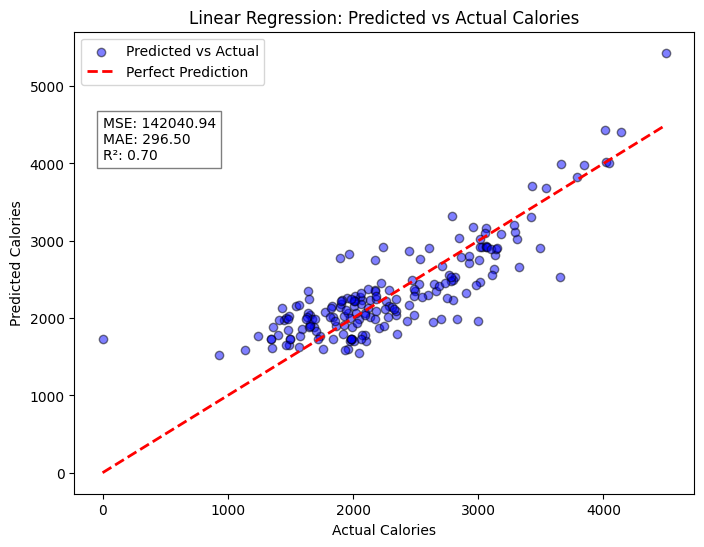

In [8]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lin_reg.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', edgecolors='k', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')

# Add labels and title
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Linear Regression: Predicted vs Actual Calories")
plt.legend()

# Display metrics on the plot
plt.text(y_test.min(), y_test.max() * 0.9, f"MSE: {mse:.2f}\nMAE: {mae:.2f}\nR²: {r2:.2f}",
         fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.show()


<ipython-input-9-8d1de8323898>:37: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="red")


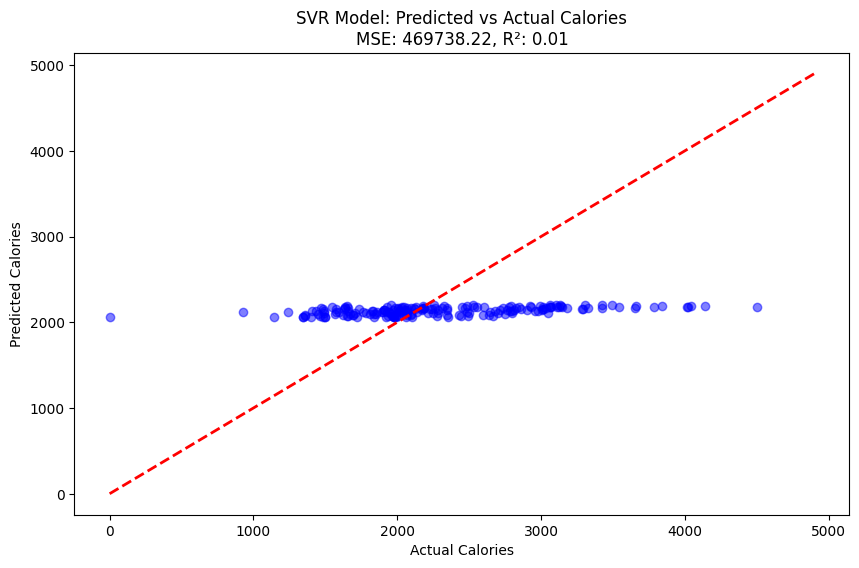

(469738.22415838455, 0.006210915685717633)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Convert ActivityDate to datetime and drop irrelevant columns
data['ActivityDate'] = pd.to_datetime(data['ActivityDate'])
data_cleaned = data.drop(columns=['Id', 'ActivityDate'])

# Define features (X) and target (y) - predicting Calories
X = data_cleaned.drop(columns=['Calories'])
y = data_cleaned['Calories']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the SVR model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.2)
svr_model.fit(X_train, y_train)

# Predict on test data
y_pred = svr_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plotting Predicted vs Actual Calories
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="red")
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title(f'SVR Model: Predicted vs Actual Calories\nMSE: {mse:.2f}, R²: {r2:.2f}')
plt.show()

mse, r2


<ipython-input-10-c266ac81ccf7>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="red")


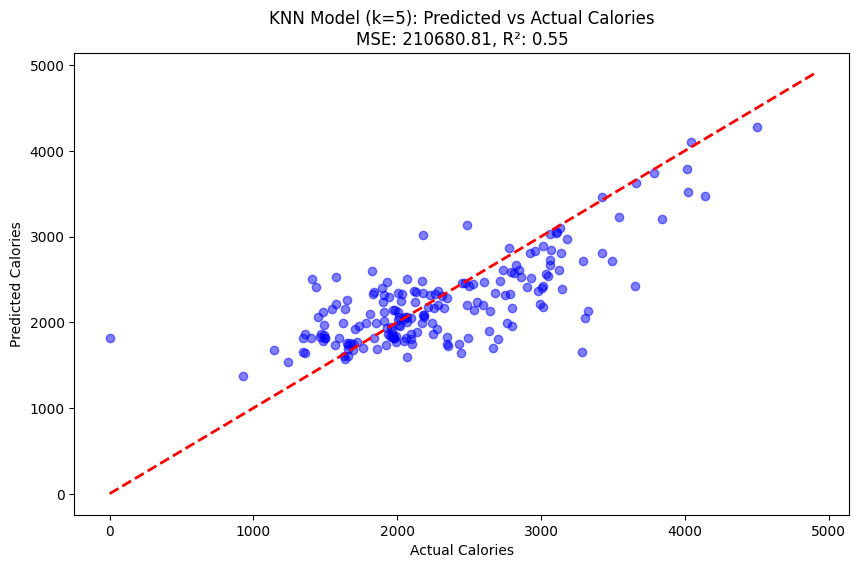

(210680.81148936172, 0.5542787877062196)

In [10]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize and train the KNN model with a default k=5
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict on test data
y_pred_knn = knn_model.predict(X_test)

# Calculate metrics
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Plotting Predicted vs Actual Calories for KNN
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="red")
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title(f'KNN Model (k=5): Predicted vs Actual Calories\nMSE: {mse_knn:.2f}, R²: {r2_knn:.2f}')
plt.show()

mse_knn, r2_knn


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
<ipython-input-11-11b6be9924b3>:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="red")


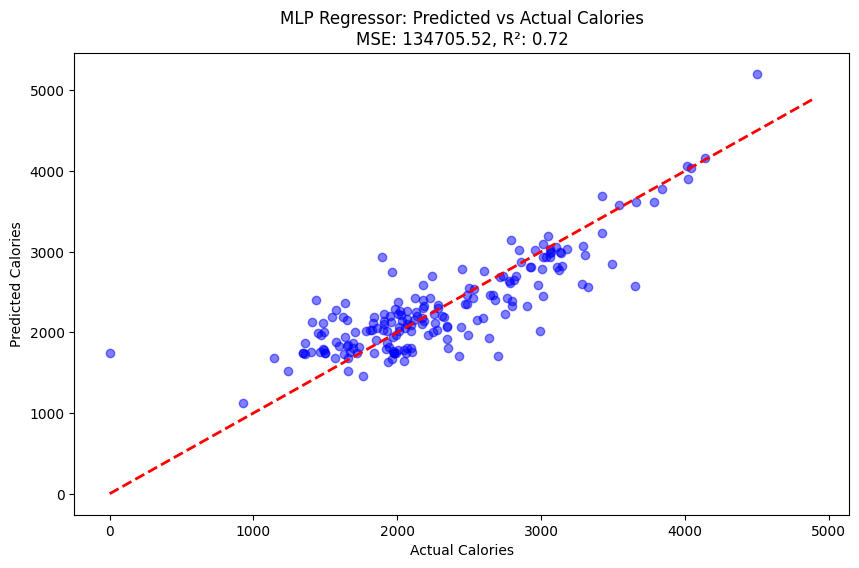

In [11]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the MLP model
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

# Predict on test data
y_pred_mlp = mlp_model.predict(X_test)

# Calculate metrics
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

# Plotting Predicted vs Actual Calories for MLP Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_mlp, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="red")
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title(f'MLP Regressor: Predicted vs Actual Calories\nMSE: {mse_mlp:.2f}, R²: {r2_mlp:.2f}')
plt.show()
